In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
#market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df.values)

In [5]:
# Create a DataFrame with the scaled data
market_data_normalized = pd.DataFrame(scaled_data)

# Copy the crypto names from the original data
market_data_normalized.columns = market_data_df.columns

# Set the coinid column as index
market_data_normalized.index = market_data_df.index

# Display sample data
market_data_normalized.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto')
    k_model.fit(market_data_normalized)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.897940
3,4,79.022435
4,5,82.623456
5,6,59.195242
6,7,45.321617
7,8,39.887143
8,9,33.708524
9,10,30.668815


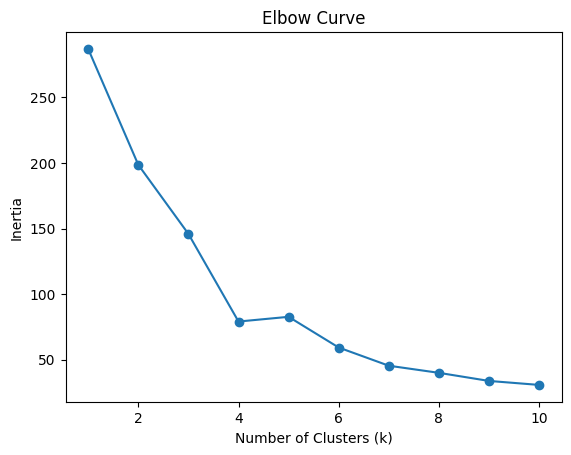

In [7]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** I would say that 4 is the best value in my case.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

In [9]:
# Fit the K-Means model using the scaled data
model.fit(market_data_normalized)

KMeans(n_clusters=4, n_init='auto', random_state=3)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_predictions = model.predict(market_data_normalized)

# View the resulting array of cluster values.
crypto_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 2, 1, 1, 1, 1],
      dtype=int32)

In [11]:
# Create a copy of the DataFrame
crypto_predictions_copy = market_data_normalized.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
crypto_predictions_copy['pred_cluster'] = crypto_predictions

# Display sample data
crypto_predictions_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,pred_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


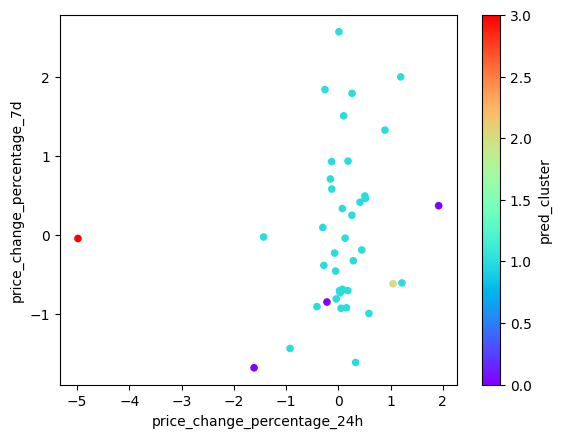

In [13]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

# Create scatter plot
crypto_predictions_copy.plot.scatter(
                               x='price_change_percentage_24h',
                               y='price_change_percentage_7d',
                               c='pred_cluster',
                               colormap = 'rainbow'
)

# Display the plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [17]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pd.DataFrame(pca.fit_transform(market_data_normalized),
                          columns=['PC1', 'PC2', 'PC3'],index = market_data_normalized.index)

# View the first five rows of the DataFrame.
crypto_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** It's about .89

In [19]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data

#I think I already did this

# Copy the crypto names from the original data

#I think I already did this

# Set the coinid column as index

#I think I have this

# Display sample data
crypto_pca.sample(10)

,PC1,PC2,PC3
coin_id,,,
tron,-0.393352,-0.108192,-0.012756
stellar,-0.489015,-0.732719,-0.062543
zcash,-0.425147,0.492976,1.058048
tether,-0.433070,-0.168126,-0.641752
monero,0.060499,2.909404,1.498571
binance-usd,-0.450211,-0.151019,-0.647401
huobi-token,-0.407483,-0.212507,-0.351426
usd-coin,-0.438408,-0.175337,-0.663388
neo,-0.362120,-0.986914,-0.728752


### Find the Best Value for k Using the PCA Data

In [20]:
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto')
    k_model.fit(crypto_pca)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,32.511232
6,7,21.674656
7,8,17.493763
8,9,15.649403
9,10,11.022416


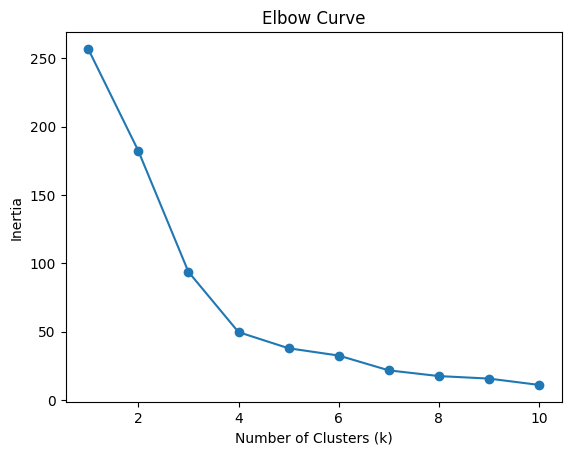

In [21]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [22]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

In [23]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca)

KMeans(n_clusters=4, n_init='auto', random_state=3)

In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_predictions_pca = model.predict(crypto_pca)

# View the resulting array of cluster values.
crypto_predictions_pca

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [26]:
# Create a copy of the DataFrame with the PCA data
pca_pred_copy = crypto_predictions_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca["crypto_cluster"] = pca_pred_copy

# Display sample data
crypto_pca.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


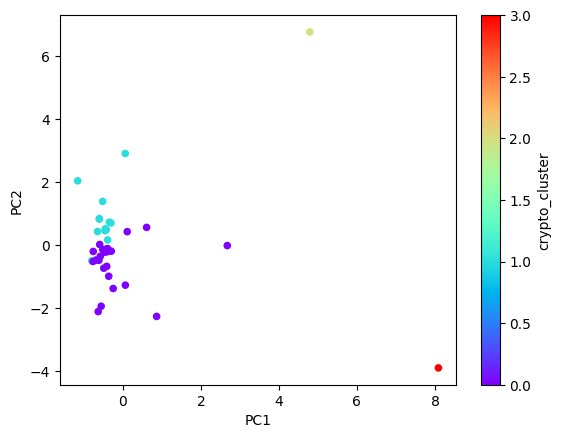

In [29]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
# Create scatter plot
crypto_pca.plot.scatter(
                               x='PC1',
                               y='PC2',
                               c='crypto_cluster',
                               colormap = 'rainbow'
)

# Display the plot
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [33]:
crypto_predictions_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,pred_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [34]:
# Use the columns from the original scaled DataFrame as the index.
crypto_predictions_copy.drop("pred_cluster",axis=1,inplace=True)
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'], index=crypto_predictions_copy.columns)
pca_component_weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:** PC1: price change percentage 200 days, PC2: price change percentage 30 days, PC3: price change percentage 7 days.
    